In [1]:
%%time
import malaya

CPU times: user 12.4 s, sys: 1.4 s, total: 13.8 s
Wall time: 17.2 s


## Explanation

Positive subjectivity: based on or influenced by personal feelings, tastes, or opinions. Can be a positive or negative sentiment.

Negative subjectivity: based on a report or a fact. Can be a positive or negative sentiment.

In [2]:
negative_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
positive_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is False.**

## Load multinomial model

In [3]:
model = malaya.subjective.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.46203835811002486, 'positive': 0.5379616418899767}
{'negative': 0.8607294776614423, 'positive': 0.13927052233855727}


[{'negative': 0.8607294776614423, 'positive': 0.13927052233855727},
 {'negative': 0.8607294776614423, 'positive': 0.13927052233855727}]

## Load xgb model

In [4]:
model = malaya.subjective.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.4284472, 'positive': 0.5715528}
{'negative': 0.9249991, 'positive': 0.07500088}


[{'negative': 0.9249991, 'positive': 0.07500088},
 {'negative': 0.9249991, 'positive': 0.07500088}]

## List available deep learning models

In [5]:
malaya.subjective.available_deep_model()

['fast-text',
 'hierarchical',
 'bahdanau',
 'luong',
 'bidirectional',
 'bert',
 'entity-network']

In [6]:
for i in malaya.subjective.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.subjective.deep_model(i)
    print(model.predict(negative_text))
    print(model.predict_batch([negative_text, positive_text]))
    print(model.predict_batch([negative_text, positive_text],get_proba=True))
    print()

Testing fast-text model
negative
['negative', 'positive']
[{'negative': 1.0, 'positive': 5.600171e-08}, {'negative': 0.25236478, 'positive': 0.74763525}]

Testing hierarchical model
negative
['negative', 'positive']
[{'negative': 0.99999225, 'positive': 7.692454e-06}, {'negative': 0.29224393, 'positive': 0.70775604}]

Testing bahdanau model
negative
['negative', 'positive']
[{'negative': 0.99998605, 'positive': 1.3971644e-05}, {'negative': 0.41739935, 'positive': 0.5826007}]

Testing luong model
positive
['positive', 'negative']
[{'negative': 0.07556655, 'positive': 0.92443347}, {'negative': 0.96075815, 'positive': 0.039241895}]

Testing bidirectional model
negative
['negative', 'positive']
[{'negative': 0.9999918, 'positive': 8.21179e-06}, {'negative': 0.046924926, 'positive': 0.95307505}]

Testing bert model
negative
['negative', 'negative']
[{'negative': 0.98487025, 'positive': 0.015129704}, {'negative': 0.98668575, 'positive': 0.013314218}]

Testing entity-network model
negative
['

## Unsupervised important words learning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # i just really like seaborn colors

We need to set `get_proba` become True to get the 'attention'.

#### Visualizing bahdanau model

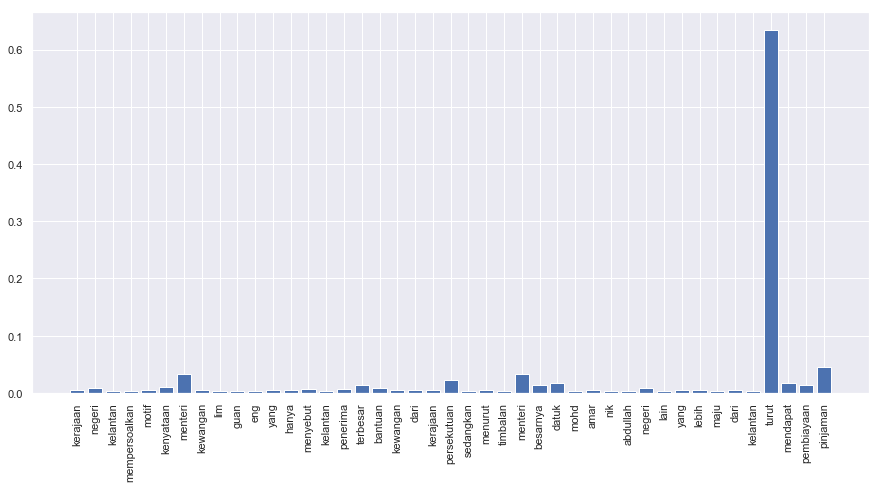

In [8]:
model = malaya.subjective.deep_model('bahdanau')
result = model.predict(negative_text, get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing luong model

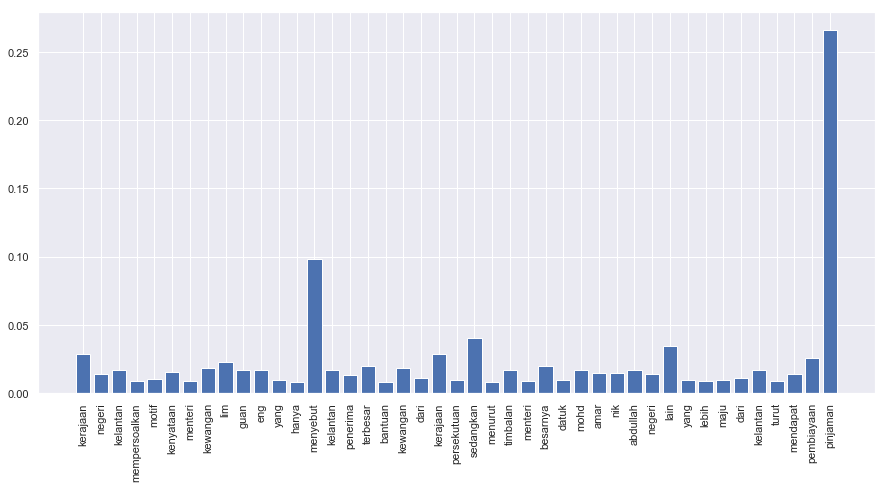

In [9]:
model = malaya.subjective.deep_model('luong')
result = model.predict(negative_text, get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing hierarchical model

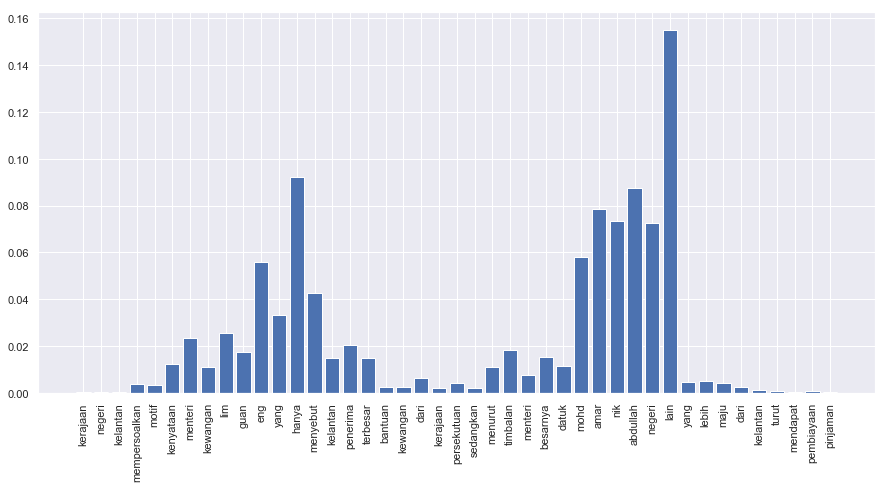

In [10]:
model = malaya.subjective.deep_model('hierarchical')
result = model.predict(negative_text, get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

## Load Sparse deep learning models

What happen if a word not included in the dictionary of the models? like `setan`, what if `setan` appeared in text we want to classify? We found this problem when classifying social media texts / posts. Words used not really a vocabulary-based contextual.

Malaya will treat **unknown words** as `<UNK>`, so, to solve this problem, we need to use N-grams character based. Malaya chose tri-grams until fifth-grams.

```python
setan = ['set', 'eta', 'tan']
```

Sklearn provided easy interface to use n-grams, problem is, it is very sparse, a lot of zeros and not memory efficient. Sklearn returned sparse matrix for the result, lucky Tensorflow already provided some sparse function.

In [11]:
malaya.subjective.available_sparse_deep_model()

['fast-text-char']

Right now Malaya only provide 1 sparse model, `fast-text-char`. We will try to evolve it.

In [12]:
sparse_model = malaya.subjective.sparse_deep_model()

INFO:tensorflow:Restoring parameters from /Users/huseinzol/Malaya/subjective/fast-text-char/model.ckpt


In [13]:
sparse_model.predict(positive_text)

'positive'

In [14]:
sparse_model.predict_batch([positive_text, negative_text])

['positive', 'negative']

In [15]:
sparse_model.predict_batch([positive_text, negative_text], get_proba=True)

[{'negative': 0.054842573, 'positive': 0.94515747},
 {'negative': 0.95071983, 'positive': 0.04928014}]